## DATA MINING FINAL PROJECT NOTEBOOK (Pt 1)

As loading all the code together in one jupyter notebook would be too heavy  for the group to upload it aswell as for the teachers to run it, if needed, the code is divided into 3 different jupyters, as follows:

- Pt1: Preprocessing pt1
- Pt2: Preprocessing pt2
- Pt3: Clustering

* [1. Importing packages and data exploration](#1.)


* [2. Data Preparation](#2.)
    * [2.1. Adjustments](#2.1.)
    * [2.2. Metric and Categorical Variables](#2.2.)
    * [2.3. Missing Values - Donors](#2.3.)
    * [2.4. Handling Outliers](#2.4.)
    * [2.4.1. Univariate Normal Distribution](#2.4.1.)
    * [2.4.2. Univariate Outliers](#2.4.2.)
    * [2.4.3. Multivariate Outliers](#2.4.3.)
    * [2.5. Missing Values - Info](#2.5.)
    * [2.6. Handling Outliers](#2.6.)
    * [2.6.1. Univariate Normal Distribution](#2.6.1.)
    * [2.6.2. Univariate Outliers](#2.6.2.)
    * [2.6.3. Multivariate Outliers](#2.6.4.)


<hr>
<a class="anchor" id="1.">
    
# 1. Importing stuff and reading them
    
</a>

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import ceil
import statsmodels as sm
import scipy as sp
from datetime import datetime
from sklearn.impute import KNNImputer
import sklearn.preprocessing as prep
import statsmodels.api as statsm
import sklearn.neighbors as neighb 
import matplotlib.colors as colors
import scipy.stats as stats 
import sklearn.preprocessing as prep
import sklearn.impute as imp
import matplotlib.gridspec as gspec
import matplotlib.cm as cm
import feature_engine.missing_data_imputers as mdi
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
from scipy.stats import chi2_contingency
from math import ceil
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from scipy.stats import spearmanr
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore")

sns.set()

In [2]:
pd.reset_option('all')


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [3]:
df = pd.read_csv(r'.\gw_data\donors.csv')

In [4]:
df = df.drop(columns = 'Unnamed: 0')

In [5]:
df.shape

(95412, 475)

In [6]:
df.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,AVGGIFT,CONTROLN,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,2009-01-01,GRI,0,IL,61081,,,1957-12-01,0,,...,7.741935,95515,0,L,4,E,X,X,X,C
1,2014-01-01,BOA,1,CA,91326,,,1972-02-01,0,,...,15.666667,148535,0,L,2,G,X,X,X,A
2,2010-01-01,AMH,1,NC,27017,,,NaN,0,,...,7.481481,15078,1,L,4,E,X,X,X,C
3,2007-01-01,BRY,0,CA,95953,,,1948-01-01,0,,...,6.812500,172556,1,L,4,E,X,X,X,C
4,2006-01-01,,0,FL,33176,,,1940-01-01,0,X,...,6.864865,7112,1,L,2,F,X,X,X,A


<hr>
<a class="anchor" id="2.">
    
# 2. Data Preparation
    
</a>

The preprocessing will consist on making some engineering in order to better understand the data and then remove columns that have a very large number of missing values (>40%). In the final version, variables with >70% missing values are removed. 

<hr>
<a class="anchor" id="2.1.">
    
# 2.1. Adjustments
    
</a>

In [7]:
df_nan = df.copy()

In [8]:
# ADJUSTMENTS TO MAKE IT EASY TO READ DATA BASED ON METADATA

pd.reset_option('all')
df_nan['NEXTDATE'].fillna(0,inplace=True)
df_nan['SOLP3']=df_nan['SOLP3'].replace(" ", "010") #The blank space is replaced with the code 010, meaning default.
df_nan['SOLIH']=df_nan['SOLIH'].replace(" ", "010") 
df_nan['MAJOR']=df_nan['MAJOR'].replace(" ", "Not Major")
df_nan['GEOCODE']=df_nan['GEOCODE'].replace(" ", "No code assigned") 
df_nan['NOEXCH']=df_nan['NOEXCH'].replace(" ","Exchange")
df_nan['NOEXCH']=df_nan['NOEXCH'].replace("X","No Exchange")
df_nan['NOEXCH']=df_nan['NOEXCH'].replace("1","Exchange")
df_nan['NOEXCH']=df_nan['NOEXCH'].replace("0","No Exchange")
df_nan['NOEXCH']=df_nan['NOEXCH'].replace(1,"Exchange")
df_nan['NOEXCH']=df_nan['NOEXCH'].replace(0,"No Exchange")
df_nan['RECINHSE']=df_nan['RECINHSE'].replace(" ", "Not In House")
df_nan['RECINHSE']=df_nan['RECINHSE'].replace("X", "Donation to In House")
df_nan['RECP3']=df_nan['RECP3'].replace(" ", "Not P3")
df_nan['RECP3']=df_nan['RECP3'].replace("X", "Donation to P3")
df_nan['RECPGVG']=df_nan['RECPGVG'].replace(" ", "Not Planned Giving")
df_nan['RECPGVG']=df_nan['RECPGVG'].replace("X", "Planned Giving")
df_nan['RECSWEEP']=df_nan['RECSWEEP'].replace(" ", "Not Sweepstakes")
df_nan['RECSWEEP']=df_nan['RECSWEEP'].replace("X", "Sweepstakes")
df_nan['PEPSTRFL']=df_nan['PEPSTRFL'].replace(" ", "Not PEP STAR")
df_nan['PEPSTRFL']=df_nan['PEPSTRFL'].replace("X", "PEP STAR")
df_nan['DATASRCE']= df_nan['DATASRCE'].replace("1","MetroMail")
df_nan['DATASRCE']= df_nan['DATASRCE'].replace("2","Polk")
df_nan['DATASRCE']= df_nan['DATASRCE'].replace("3","Metro+Polk")
df_nan['MAILCODE']= df_nan['MAILCODE'].replace(" ","Address Ok")
df_nan['MAILCODE']= df_nan['MAILCODE'].replace("B","Address Bad")
df_nan['HOMEOWNR']= df_nan['HOMEOWNR'].replace(" ","Unknown")
df_nan['HOMEOWNR']= df_nan['HOMEOWNR'].replace("U","Unknown")
df_nan['HOMEOWNR']= df_nan['HOMEOWNR'].replace("H","Home_Owner")
df_nan['GENDER']= df_nan['GENDER'].replace(" ","Unknown Gender")
df_nan['GENDER']= df_nan['GENDER'].replace("M","Male")
df_nan['GENDER']= df_nan['GENDER'].replace("F","Female")
df_nan['GENDER']= df_nan['GENDER'].replace("U","Unknown Gender")
df_nan['GENDER']= df_nan['GENDER'].replace("J","Unknown Gender")
df_nan['GENDER']= df_nan['GENDER'].replace("C","Unknown Gender")
df_nan['GENDER']= df_nan['GENDER'].replace("A","Unknown Gender")
df_nan['COLLECT1']= df_nan['COLLECT1'].replace(" ","N")
df_nan['VETERANS']= df_nan['VETERANS'].replace(" ","N")
df_nan['BIBLE']= df_nan['BIBLE'].replace(" ","N")
df_nan['CATLG']= df_nan['CATLG'].replace(" ","N")
df_nan['HOMEE']= df_nan['HOMEE'].replace(" ","N")
df_nan['PETS']= df_nan['PETS'].replace(" ","N")
df_nan['CDPLAY']= df_nan['CDPLAY'].replace(" ","N")
df_nan['STEREO']= df_nan['STEREO'].replace(" ","N")
df_nan['PCOWNERS']=df_nan['PCOWNERS'].replace(" ","N")
df_nan['CRAFTS']= df_nan['CRAFTS'].replace(" ","N")
df_nan['FISHER']= df_nan['FISHER'].replace(" ","N")
df_nan['GARDENIN']= df_nan['GARDENIN'].replace(" ","N")
df_nan['BOATS']= df_nan['BOATS'].replace(" ","N")
df_nan['WALKER']= df_nan['WALKER'].replace(" ","N")
df_nan['KIDSTUFF']= df_nan['KIDSTUFF'].replace(" ","N")
df_nan['CARDS']= df_nan['CARDS'].replace(" ","N")
df_nan['PLATES']= df_nan['PLATES'].replace(" ","N")


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [9]:
# REPLACED BLANK SPACES WITH NAN, AFTER READJUSTED DATA
df_nan.replace('',np.nan, inplace = True)
df_nan.replace(' ',np.nan, inplace = True)

In [10]:
df_nan.isna().sum().sort_values(ascending = False)

RDATE_5    95403
RAMNT_5    95403
RAMNT_3    95170
RDATE_3    95170
RAMNT_4    95131
           ...  
OCC10          0
OCC11          0
OCC12          0
OCC13          0
ODATEDW        0
Length: 475, dtype: int64

Even before we start the preprocessing itself, we decided to remove all the features that have 40% or plus filling these values, once we believe that missing these values may lead to some unreal description of the real analysis.

In [11]:
#THRESHOLD
df_nan.shape[0] * 0.40 

38164.8

In [12]:
#CHECKING IF WE ARE DELETING SOME IMPORTING DATA 
df_nan.loc[:, (df.isna().sum() >30000) & (df.isna().sum() <= 50000)].head()

,WEALTH1,WEALTH2,ADATE_5,ADATE_10,ADATE_13,ADATE_21,ADATE_24
0,NaN,5.0,2016-04-01,2015-10-01,2015-07-01,2014-10-01,2014-06-01
1,9.0,9.0,2016-04-01,2015-10-01,NaN,2014-10-01,2014-06-01
2,1.0,1.0,2016-04-01,NaN,2015-07-01,NaN,2014-06-01
3,4.0,0.0,2016-04-01,NaN,2015-07-01,2014-10-01,NaN
4,2.0,NaN,2016-04-01,2015-10-01,2015-02-01,2014-10-01,2014-06-01


In [13]:
df_nan = df_nan.loc[:, (df_nan.isna().sum() <= 38164.8)]

In [14]:
print('We deleted', df.shape[1] - df_nan.shape[1], 'columns from df, which had more than 40% of missing values. Thus,we still have', round((100-(476 - df_nan.shape[1])/476*100),0), '% of all the dataset\n')

We deleted 76 columns from df, which had more than 40% of missing values. Thus,we still have 84.0 % of all the dataset



In [15]:
df_nan.isna().sum().sort_values(ascending = False)

ADATE_24    36973
RFA_24      36973
ADATE_21    35212
RFA_21      35212
ADATE_5     33590
            ...  
EIC3            0
EIC4            0
EIC5            0
EIC6            0
ODATEDW         0
Length: 399, dtype: int64

This re-arrange will make the informations on dates more readable

In [16]:
dates = []
for row in df_nan.filter(regex = 'DATE').columns:
    dates.append(row)

In [17]:
def get_data(df):
    for row in df.filter(regex='DATE').columns:
        df[row] = df[row].apply(str)
        df[row] = df[row].str[:4]
        df[row] = df[row].apply(float)
        
df_nan['DOB'].replace('A', np.nan, inplace = True)
df_nan['DOB'] = df_nan['DOB'].apply(str)
df_nan['DOB'] = df_nan['DOB'].str[:4]
df_nan['DOB'] = df_nan['DOB'].apply(float)
df_nan['AGE'] = 2020 - df_nan['DOB']
df_nan = df_nan.drop(columns = 'DOB')

In [18]:
get_data(df_nan)

In [19]:
df_nan[dates]

,ODATEDW,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,...,ADATE_19,ADATE_21,ADATE_22,ADATE_24,MAXADATE,MINRDATE,MAXRDATE,LASTDATE,FISTDATE,NEXTDATE
0,2009.0,2017.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2015.0,2015.0,...,2014.0,2014.0,2014.0,2014.0,2017.0,2012.0,2014.0,2015.0,2009.0,2010.0
1,2014.0,2017.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2015.0,2015.0,...,2014.0,2014.0,2014.0,2014.0,2017.0,2013.0,2015.0,2015.0,2013.0,2015.0
2,2010.0,2017.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2015.0,NaN,...,2014.0,NaN,2014.0,2014.0,2017.0,2011.0,2012.0,2015.0,2010.0,2011.0
3,2007.0,2017.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2015.0,NaN,...,2014.0,2014.0,2014.0,NaN,2017.0,2007.0,2014.0,2015.0,2007.0,2007.0
4,2006.0,2017.0,2016.0,2016.0,2016.0,2016.0,2015.0,2016.0,2015.0,2015.0,...,2014.0,2014.0,2015.0,2014.0,2017.0,2013.0,2016.0,2016.0,1999.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,2016.0,2017.0,2016.0,2016.0,NaN,2016.0,2016.0,2015.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,2016.0,2016.0,2016.0,2016.0,0.0
95408,2016.0,2017.0,NaN,NaN,NaN,NaN,2016.0,2016.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,2016.0,2016.0,2016.0,2016.0,0.0
95409,2015.0,2017.0,2016.0,2016.0,2016.0,2016.0,NaN,2016.0,2015.0,2015.0,...,NaN,2014.0,2014.0,NaN,2017.0,2016.0,2015.0,2016.0,2014.0,2015.0
95410,2006.0,2017.0,2016.0,2016.0,2016.0,2016.0,2016.0,2016.0,2015.0,2015.0,...,2014.0,2014.0,2014.0,2014.0,2017.0,2010.0,2016.0,2017.0,2006.0,2007.0


In [20]:
df = df_nan.copy()

<hr>
<a class="anchor" id="2.2.">
    
# 2.2. Metric and Categorical variables
    
</a>

Besides dividing data into metric and non metric (i.e. categorical), we also will split data into information about the donors - **donors** - and information about demographic aspects of the donors - **info** - in order to do a better analysis after the clusters.

In [21]:
donors= df.copy()
donors_sup=donors.copy()
info= donors_sup.copy()

In [22]:
cols_neigh = list(range(72,358)) 
info= info[info.columns[cols_neigh]]

In [23]:
info_sup= donors_sup[['TCODE','STATE','ZIP','INCOME','DOMAIN','MAILCODE','HOMEOWNR','GENDER', 'MALEMILI','MALEVET',
                      'VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV','COLLECT1','VETERANS','BIBLE','CATLG','HOMEE',
                      'PETS','CDPLAY','STEREO', 'CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES',
                      'HPHONE_D','GEOCODE2']]

In [24]:
info= info_sup.merge(info, left_index= True, right_index= True)

In [25]:
donors_col = donors.columns.drop(info.columns).tolist()

In [26]:
donors = donors[donors_col]

In [27]:
info['AGE'] = df['AGE'].copy()

In [28]:
info['CONTROLN'] = donors_sup['CONTROLN']
donors.set_index('CONTROLN',inplace=True)
info.set_index('CONTROLN',inplace=True)
donors = donors.drop(columns = 'AGE')

In [29]:
donors_metric= ['HIT','CARDPROM','NUMPROM','CARDPM12','NUMPRM12','RAMNTALL','NGIFTALL','CARDGIFT','MINRAMNT',
                'MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT']
donors_categorical= donors.columns.drop(donors_metric).to_list()

In [30]:
info_metric= ['AGE','INCOME','MALEMILI','MALEVET','VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV',
              'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907',
              'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1',
              'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN1', 'HHN2', 'HHN3', 'HHN4', 
              'HHN5', 'HHN6', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'HHP1', 'HHP2', 'DW1', 'DW2', 'DW3', 'DW4', 'DW5',
              'DW6', 'DW7', 'DW8', 'DW9', 'HV1', 'HV2', 'HV3', 'HV4', 'HU1', 'HU2', 'HU3', 'HU4', 'HU5', 'HHD1', 'HHD2',
              'HHD3', 'HHD4', 'HHD5', 'HHD6', 'HHD7', 'HHD8', 'HHD9', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC2', 'ETHC3',
              'ETHC4', 'ETHC5', 'ETHC6', 'HVP1', 'HVP2', 'HVP3', 'HVP4', 'HVP5', 'HVP6', 'HUR1', 'HUR2', 'RHP1', 'RHP2', 
              'RHP3', 'RHP4', 'HUPA1', 'HUPA2', 'HUPA3', 'HUPA4', 'HUPA5', 'HUPA6', 'HUPA7', 'RP1', 'RP2', 'RP3', 'RP4',
              'MSA', 'ADI', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6', 'IC7', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12',
              'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC20', 'IC21', 'IC22', 'IC23', 'HHAS1', 'HHAS2',
              'HHAS3', 'HHAS4', 'MC1', 'MC2', 'MC3', 'TPE1', 'TPE2', 'TPE3', 'TPE4', 'TPE5', 'TPE6', 'TPE7', 'TPE8', 
              'TPE9', 'PEC1', 'PEC2', 'TPE10', 'TPE11', 'TPE12', 'TPE13', 'LFC1', 'LFC2', 'LFC3', 'LFC4', 'LFC5', 'LFC6',
              'LFC7', 'LFC8', 'LFC9', 'LFC10', 'OCC1', 'OCC2', 'OCC3', 'OCC4', 'OCC5', 'OCC6', 'OCC7', 'OCC8', 'OCC9',
              'OCC10', 'OCC11', 'OCC12', 'OCC13', 'EIC1', 'EIC2', 'EIC3', 'EIC4', 'EIC5', 'EIC6', 'EIC7', 'EIC8', 'EIC9',
              'EIC10', 'EIC11', 'EIC12', 'EIC13', 'EIC14', 'EIC15', 'EIC16', 'OEDC1', 'OEDC2', 'OEDC3', 'OEDC4', 'OEDC5',
              'OEDC6', 'OEDC7', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'EC7', 'EC8', 'SEC1', 'SEC2', 'SEC3', 'SEC4', 
              'SEC5', 'AFC1', 'AFC2', 'AFC3', 'AFC4', 'AFC5', 'AFC6', 'VC1', 'VC2', 'VC3', 'VC4', 'ANC1', 'ANC2', 'ANC3',
              'ANC4', 'ANC5', 'ANC6', 'ANC7', 'ANC8', 'ANC9', 'ANC10', 'ANC11', 'ANC12', 'ANC13', 'ANC14', 'ANC15', 'POBC1',
              'POBC2', 'LSC1', 'LSC2', 'LSC3', 'LSC4', 'VOC1', 'VOC2', 'VOC3', 'HC1', 'HC2', 'HC3', 'HC4', 'HC5', 'HC6',
              'HC7', 'HC8', 'HC9', 'HC10', 'HC11', 'HC12', 'HC13', 'HC14', 'HC15', 'HC16', 'HC17', 'HC18', 'HC19', 'HC20',
              'HC21', 'MHUC1', 'MHUC2', 'AC1']
info_categorical= info.columns.drop(info_metric).to_list()

In [31]:
#There are the same number of NaNs in NEXTDATE and TIMELAG, which we assumed was because 9973 individuals only contributed
#with one gift, so there was no record of a second gift to take into account. To prove this, we had to check whether the
#date of the last gift was equal to the date of the first ever gift, which it is.

print(donors.loc[184568]['LASTDATE'])
print(donors.loc[184568]['FISTDATE'])

2016.0
2016.0


In [32]:
#Removing TIMELAG for the imputation, given that we would be instilling bias into the data

TIMELAG = donors[['TIMELAG']]
donors.drop(labels='TIMELAG', axis=1,inplace=True)
donors_metric.remove('TIMELAG')

In [33]:
#Removing NEXTDATE for the imputation, given that we would be instilling bias into the data, by giving dates for the
#2nd gift for donors who only provided one donation. 

NEXTDATE = donors[['NEXTDATE']]
donors.drop(labels='NEXTDATE', axis=1,inplace=True)
donors_categorical.remove('NEXTDATE')

In [34]:
info_metric = info[info_metric]
info_categorical = info[info_categorical]
donors_metric = donors[donors_metric]
donors_categorical = donors[donors_categorical]

In [35]:
def sizes():
    print('Info:',info.shape[0], 'rows and', info.shape[1],'comlumns')
    print('Donors:',donors.shape[0], 'rows and', donors.shape[1],'comlumns')
    print('IMetric:',info_metric.shape[0], 'rows and', info_metric.shape[1],'comlumns')
    print('DMetric:',donors_metric.shape[0], 'rows and', donors_metric.shape[1],'comlumns')
    print('ICategorical:',info_categorical.shape[0], 'rows and', info_categorical.shape[1],'comlumns')
    print('DCategorical:',donors_categorical.shape[0], 'rows and', donors_categorical.shape[1],'comlumns')
    print('Reduced', 476 - (info_metric.shape[1] + donors_metric.shape[1] + info_categorical.shape[1]
                            + donors_categorical.shape[1]), 'from the original dataset')
sizes()

Info: 95412 rows and 320 comlumns
Donors: 95412 rows and 76 comlumns
IMetric: 95412 rows and 269 comlumns
DMetric: 95412 rows and 12 comlumns
ICategorical: 95412 rows and 51 comlumns
DCategorical: 95412 rows and 64 comlumns
Reduced 80 from the original dataset


<hr>
<a class="anchor" id="2.3.">
    
# 2.3. Missing Values - Donors
    
</a>

Although being aware that the ideal and more scientifically correct process would be to do a simple imputation first, handle outliers and, after that, applying a more robust imputation, we will use right away a robust method to impute the missing values (KNN Imputer). We decided to handle the process this way, once the original way was getting us worst results, with cluster not so well defined as the ones we can observe at the Clusters' Chapter.

A univariate outlier is a data point that consists of an extreme value on one variable. A multivariate outlier is a combination of unusual scores on at least two variables. Both types of outliers can influence the outcome of statistical analyses. Therefore, we find it very important to assess these two types of outliers.

Source: 
- https://www.ritchieng.com/machine-learning-project-customer-segments/
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html



**DONORS_METRIC**

In [36]:
test_metric = donors_metric.copy()
imputer = KNNImputer(n_neighbors=50)
test_metric = imputer.fit_transform(test_metric)

In [37]:
test_metric.shape

(95412, 12)

In [38]:
imputed_info_m = pd.DataFrame(test_metric, donors_metric.index)
imputed_info_m.columns = donors_metric.columns

In [39]:
donors_metric = imputed_info_m.copy()

In [40]:
donors_metric.isna().sum().sort_values(ascending = False).head()

AVGGIFT     0
LASTGIFT    0
MAXRAMNT    0
MINRAMNT    0
CARDGIFT    0
dtype: int64

**Donors Categorical**

In [41]:
donors_categorical.isna().sum().sort_values(ascending = False).head(30)

RFA_24      36973
RFA_21      35212
RFA_10      32748
RFA_17      27650
RFA_22      25648
RFA_19      24492
DATASRCE    21280
RFA_18      21263
RFA_16      20417
RFA_14      18867
RFA_9       11245
RFA_11      10422
RFA_12       8923
RFA_8        3511
OSOURCE       928
FISTDATE        2
GEOCODE         0
POP903          0
POP90C1         0
POP90C2         0
POP90C3         0
POP902          0
POP90C4         0
POP90C5         0
POP901          0
PEPSTRFL        0
PCOWNERS        0
MDMAUD_A        0
MAJOR           0
SOLIH           0
dtype: int64

In [42]:
missings = donors_categorical[['RFA_24','RFA_21','RFA_10','RFA_17','RFA_22','RFA_19','DATASRCE','RFA_18','RFA_16',
                               'RFA_14','RFA_9','RFA_11','RFA_12','RFA_8','OSOURCE','FISTDATE'              
                              ]]

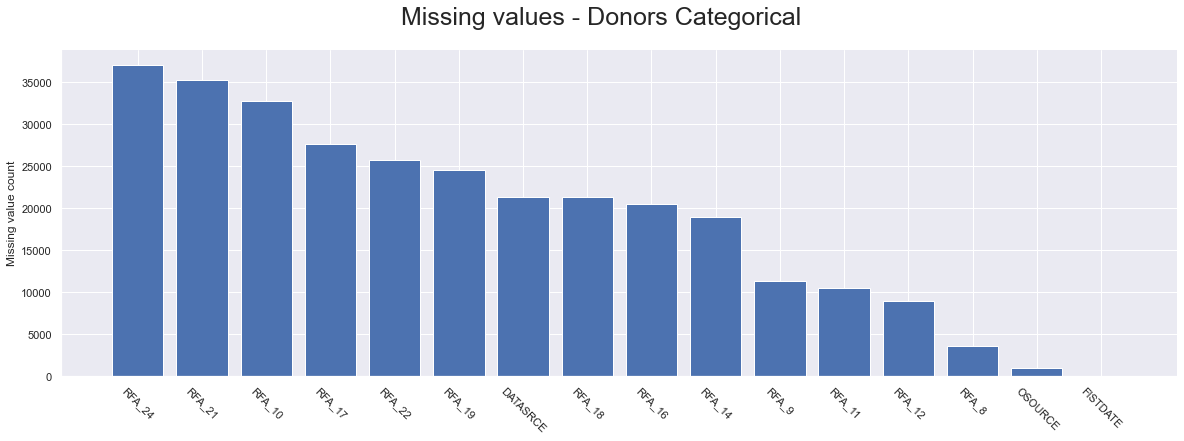

In [43]:
#Number of missing values in each feature
sns.set()

#figure
fig,ax1 = plt.subplots(1,figsize=(20,6))

#data
ax1_data=missings.isna().sum().sort_values(ascending=False)
ax1.bar(x=ax1_data.index, height=ax1_data)

#layout
plt.suptitle("Missing values - Donors Categorical", fontsize=25)

ax1.set_ylabel("Missing value count")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
for tick in ax1.get_xticklabels():
    tick.set_rotation(-45)

plt.show()

Once only categorical feautures have missing values, the imputation will be made using Most Frequent value, choosen for its simplicity and for working quite well on categorical data.

In [44]:
test = donors_categorical.copy()
imputer = mdi.RandomSampleImputer(seeding_method='add')
imputer.fit(test)
test = imputer.transform(test)

In [45]:
test.isna().sum().sort_values(ascending = False).head()

MDMAUD_A    0
MDMAUD_F    0
ETH7        0
ETH6        0
ETH5        0
dtype: int64

In [46]:
donors_categorical = test.copy()

<hr>
<a class="anchor" id="2.4.">
    
# 2.4. Handling Outliers - Donors
</a>

Source:
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
- https://www.statisticssolutions.com/univariate-and-multivariate-outliers/

The following was also inspired by David Silva & Susana Paco, Data Mining’s Final Project, available at:
- https://github.com/DavidSilva98/DataMiningFinalProject 

Thus, Pratical lessons (Labs) guide the major part of the preprocessing, which can be found on NOVA IMS' Moodle.

<hr>
<a class="anchor" id="2.4.1.">
    
# 2.4.1. Univariate Normal Distribution
    
</a>

We'll use two of the most common approaches to make data more Gaussian-like: Yeo-Johnson and Quantile transformations

In [47]:
data = donors_metric.copy()

In [48]:
# Transformations
rstate = np.random.RandomState(304)
yj = prep.PowerTransformer(method='yeo-johnson')
qt = prep.QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=rstate)

# Fitting transformations
Donors_yj = yj.fit_transform(data)
Donors_qt = qt.fit_transform(data)

Dftransformed = np.concatenate((Donors_qt, Donors_yj), axis=1)

# Creating DataFrame
merge_labels =list(map(lambda x: "yj_" + x, data.columns.to_list()))+list(map(lambda x: "qt_" + x, data.columns.to_list()))
df_donors = pd.DataFrame(Dftransformed, columns=merge_labels, index=data.index)

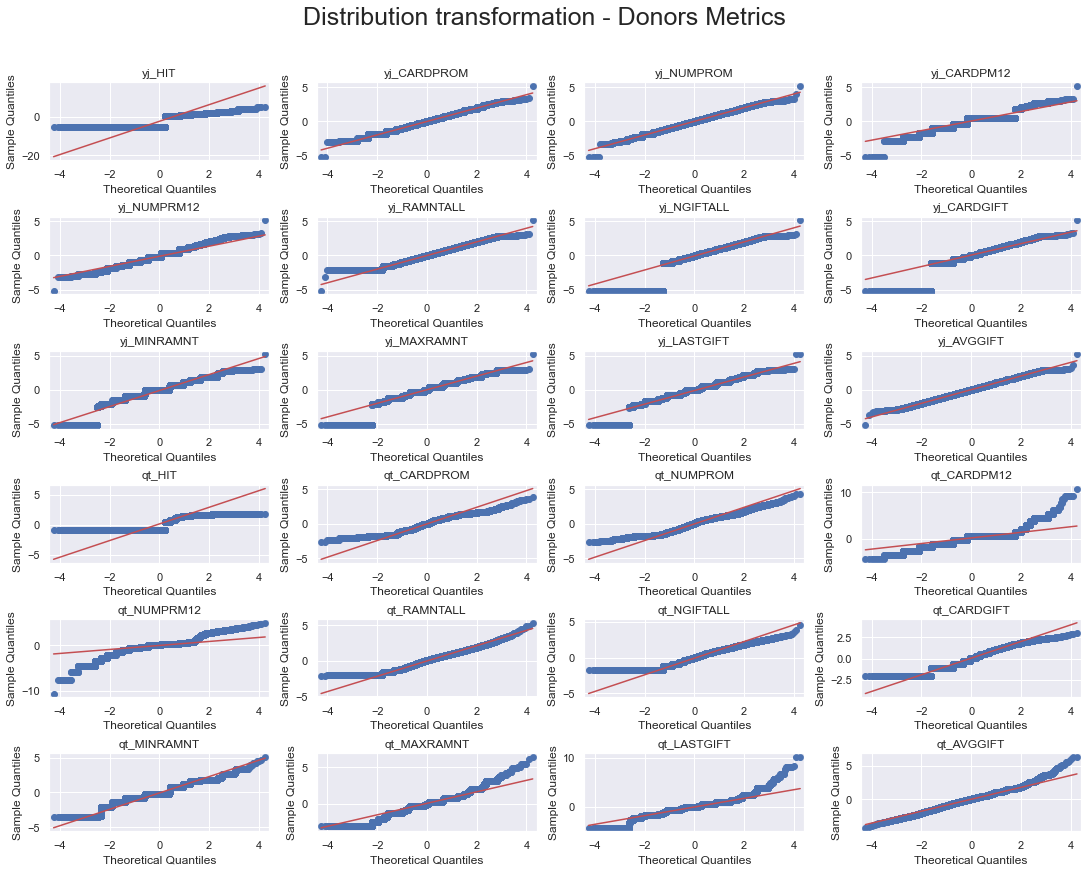

In [49]:
# Plotting data after transformation
sns.set()
fig, axes = plt.subplots(6,4, constrained_layout=True, figsize=(15,12))

fig.suptitle("Distribution transformation - Donors Metrics\n", fontsize=25)

for col, ax in zip(df_donors.columns, axes.flatten()):
    x = df_donors.loc[:,col]
    statsm.qqplot(x, line="q", ax=ax)
    ax.set_title(col)

plt.show()

The alligment in the charts of the points over the line tells us that the transformation to a Normal Distribuition is quite aceptable.

<hr>
<a class="anchor" id="2.4.2.">
    
# 2.4.2. Univariate Outliers
    
</a>

In [50]:
# OUTLIERS FROM DONORS
qt_donors = df_donors.loc[:,[i for i in df_donors.columns.to_list() if "qt" in i]]
yj_donors = df_donors.loc[:,[i for i in df_donors.columns.to_list() if "yj" in i]]

For each row, we'll check univariate outliers through the Standard Deviation and the IQR method, which may not be very accurate due to the big amount of data and their dispersion.

In [51]:
def std(data, n =3.0, return_thresholds=False):
    data_mean = data.mean()
    data_std = data.std()
    threshold = data_std * n
    lower, upper = data_mean - threshold, data_mean + threshold
    if return_thresholds:
        return lower, upper
    else:
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

def iqr(data, k=1.5, return_thresholds=False):
    q25, q75 = np.percentile(data, 25, axis=0), np.percentile(data, 75, axis=0)
    iqr = q75 - q25
    threshold = iqr * k
    lower, upper = q25 - threshold, q75 + threshold
    if return_thresholds:
        return lower, upper
    else:
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

In [52]:
#OUTLIERS FOR DONORS
outlier_donors = pd.concat([std(yj_donors, 4), std(qt_donors, 4), iqr(yj_donors, 2.5), iqr(qt_donors, 2.5)], axis=1)
outlier_donors.columns = ["outyjstd","outqtstd","outyjiqr","outqtiqr"]

Once we're dealing with a lot of data and its variance it's quite high, we cant be too restrict on the conditions, even though 
we might not get a very accurate outlier removal this way.

<hr>
<a class="anchor" id="2.4.3.">
    
# 2.4.3. Multivariate Outliers
    
</a>

Multivariate outliers will be identified with the use of local outlier factor (LOF)

The LOF is based on a concept of a local density, where locality is given by k-nearest neighbours, whose distance is used to estimate the density. By comparing the local density of an object to the local densities of its neighbours, one can identify regions of similar density, and points that have a substantially lower density than their neighbours, which are considered to be outliers.

## Donors

In [53]:
std_data = prep.MinMaxScaler().fit_transform(data)

In [54]:
lof = neighb.LocalOutlierFactor(n_neighbors=50, contamination="auto")
outlof = lof.fit_predict(std_data)
lof_scores = lof.fit(std_data).negative_outlier_factor_

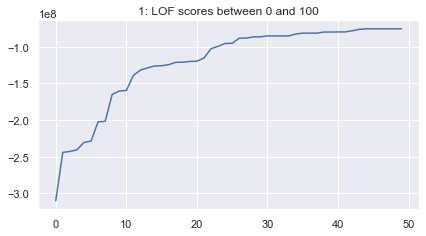

In [55]:
sns.set()

fig = plt.figure(figsize=(15,8))
gs = gspec.GridSpec(2,2)
ax1 = fig.add_subplot(gs[1,0]) 
ax1.plot(np.sort(lof_scores)[:50])
ax1.set_title("1: LOF scores between 0 and 100")
plt.subplots_adjust(hspace=0.3)

plt.show()

The LOF graphics gives us information that, for the vast majority of the observations, the score is quite normal. However, there's around 20-25 observations that will be considered potential outliers, as its scores differ from the rest.

In [56]:
top_lof_scores = data.index.isin(lof_scores.argsort()[:20]+1)

In [57]:
outlier_donors = pd.concat([outlier_donors,pd.Series(data=(outlof==-1), index=data.index),
                            pd.Series(data=top_lof_scores, index=data.index)], axis=1)
outlier_donors.columns = ["outyjstd", "outqtstd", "outyjiqr", "outqtiqr", "outlof", "outlofscree"]

In [58]:
pd.DataFrame(np.round((outlier_donors).mean(),3)*100, columns=["Proportion of potential outliers for each method:"])

,Proportion of potential outliers for each method:
outyjstd,2.0
outqtstd,1.7
outyjiqr,15.4
outqtiqr,10.3
outlof,5.3
outlofscree,0.0


We decided to use a combination of the local outlier factor and the more common std (both yeo-johnson and qt). In fact, we also complemented the process with the IQR method (qt), once it increased the efficiency of the process.This way, we'll eliminate outliers that would bias our analysis, whilst keeping around 97% of the initial data.

One important note is that the IQR scored high, given that the dataset is not normally distributed and, therefore, almost all variables have a very high range of values.

In [59]:
#working only with those who, at least, we're flagged 2 times
out_mask = outlier_donors[['outqtstd','outlof','outyjstd','outqtiqr']].apply(lambda x: x.sum(), axis=1) > 1

In [60]:
out_mask.value_counts()

False    92827
True      2585
dtype: int64

## Checking Results

Even though we deleted around 3% of the data, one can still see that there are a lot of potencial outliers remaining in the data, according to other methods.

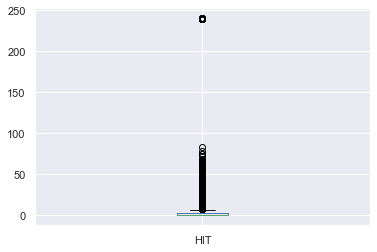

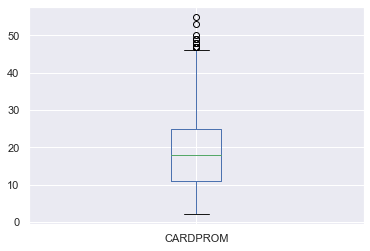

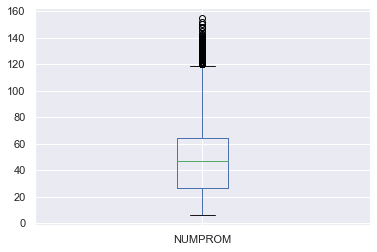

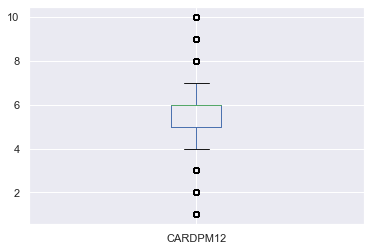

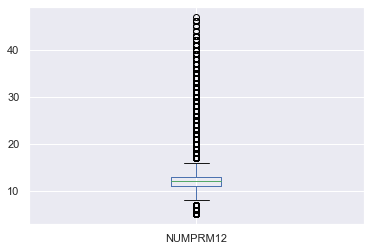

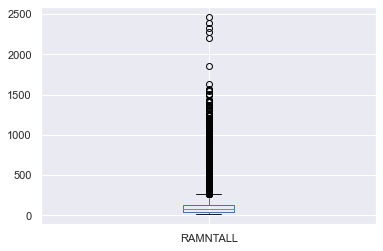

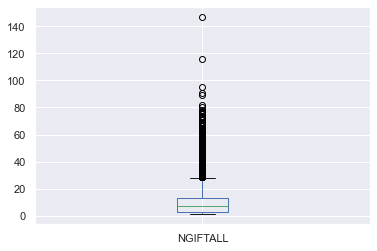

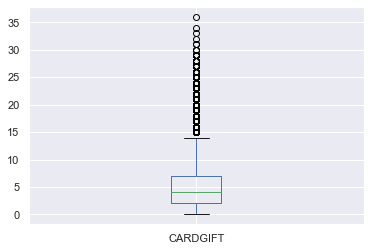

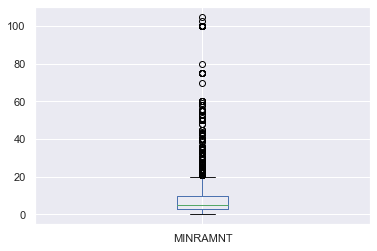

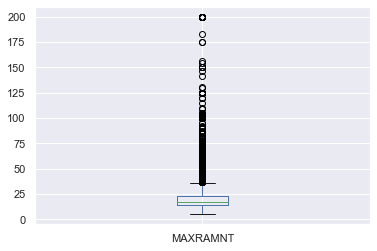

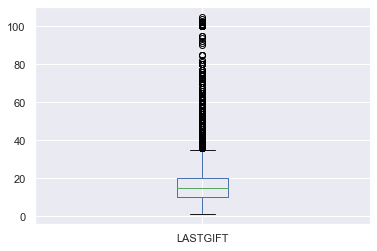

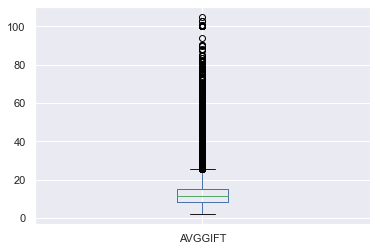

In [61]:
def outliers(df):
    for row in df.columns:
        df[row].plot(kind='box')
        plt.show()        
outliers(donors_metric[~out_mask])

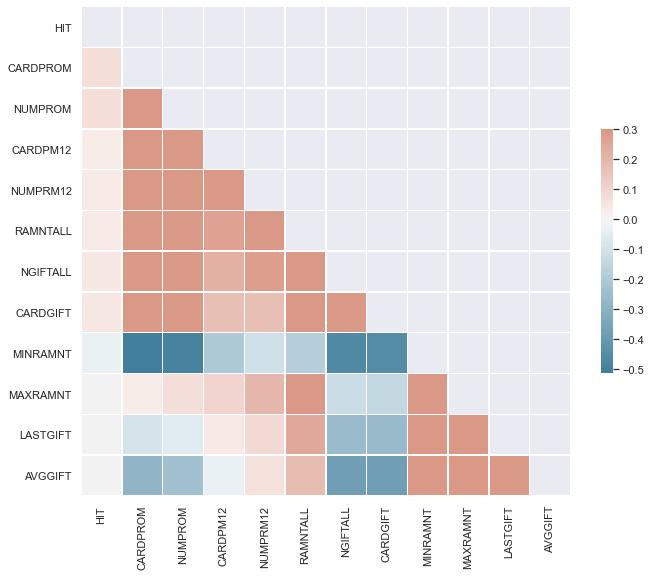

In [62]:
# CORRELATION MATRIX
df = pd.DataFrame(data=donors_metric[~out_mask])
corr = df.corr()
upper = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=upper, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This heatmap shows us that correlations are neither very high or very low values, which could be redundant and make the clusters analysis harder.

In [63]:
df_out = data[out_mask] 

In [64]:
donors = donors[~out_mask]

<hr>
<a class="anchor" id="2.5.">
    
# 2.5. Missing Values - Info
    
</a>

It will now be applied to Info variables the exact same procedures as for Donors features and, for that reason, we'll skip some explanations, once they're the same as for Donors. Thus, since there are nearly 270 features, visualizations will also be reduced in order to spare some space and memory.

**Info Metric**

In [66]:
test = info.copy()
test_metric = info_metric.copy()
test_categorical = info_categorical.copy()

In [67]:
test_metric.isna().sum().sort_values(ascending = False).head()

AGE       23883
INCOME    21286
MSA         132
ADI         132
DMA         132
dtype: int64

In [68]:
imputer = KNNImputer(n_neighbors=50)
test_metric = imputer.fit_transform(test_metric)

In [69]:
test_metric.shape

(95412, 269)

In [70]:
imputed_info_m = pd.DataFrame(test_metric, info_metric.index)
imputed_info_m.columns = info_metric.columns

In [71]:
imputed_info_m

,AGE,INCOME,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,AGE902,...,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,63.00,3.72,0.0,39.0,34.0,18.0,10.0,2.0,1.0,48.0,...,0.0,0.0,33.0,65.0,40.0,99.0,99.0,6.0,2.0,10.0
148535,48.00,6.00,0.0,15.0,55.0,11.0,6.0,2.0,1.0,41.0,...,0.0,0.0,99.0,0.0,99.0,99.0,99.0,20.0,4.0,6.0
15078,60.66,3.00,0.0,20.0,29.0,33.0,6.0,8.0,1.0,43.0,...,0.0,15.0,22.0,77.0,17.0,97.0,92.0,9.0,2.0,6.0
172556,72.00,1.00,0.0,23.0,14.0,31.0,3.0,0.0,3.0,40.0,...,0.0,16.0,23.0,77.0,22.0,93.0,89.0,16.0,2.0,6.0
7112,80.00,3.00,1.0,28.0,9.0,53.0,26.0,3.0,2.0,45.0,...,0.0,0.0,99.0,1.0,21.0,99.0,96.0,6.0,2.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184568,56.78,4.46,14.0,36.0,47.0,11.0,7.0,8.0,13.0,35.0,...,0.0,1.0,93.0,7.0,98.0,99.0,98.0,16.0,4.0,4.0
122706,50.00,7.00,0.0,31.0,43.0,19.0,4.0,1.0,0.0,40.0,...,0.0,0.0,69.0,31.0,67.0,99.0,97.0,18.0,5.0,3.0
189641,62.00,3.06,0.0,18.0,46.0,20.0,7.0,23.0,0.0,35.0,...,0.0,4.0,99.0,0.0,99.0,99.0,99.0,5.0,2.0,3.0


In [72]:
imputed_info_m.isna().sum().sort_values(ascending = False).head()

AC1      0
HVP3     0
HUPA5    0
HUPA4    0
HUPA3    0
dtype: int64

In [73]:
info_metric = imputed_info_m.copy()

**Info Categorical**

In [74]:
test_categorical.isna().sum().sort_values(ascending = False).head(30)

ADATE_24    36973
ADATE_21    35212
RFA_5       33590
ADATE_5     33590
ADATE_10    32748
ADATE_17    27650
ADATE_22    25648
ADATE_19    24480
ADATE_18    21263
ADATE_16    20364
ADATE_14    18867
ADATE_9     11245
ADATE_11    10422
ADATE_12     8923
ADATE_7      8874
RFA_7        8874
ADATE_6      3557
RFA_6        3557
ADATE_8      3511
DOMAIN       2316
RFA_4        2312
ADATE_4      2191
RFA_3        1950
ADATE_3      1950
GEOCODE2      319
CDPLAY          0
COLLECT1        0
HOMEE           0
CATLG           0
BIBLE           0
dtype: int64

In [75]:
missings = test_categorical[['ADATE_24','ADATE_21','ADATE_5','RFA_5','ADATE_10','ADATE_17','ADATE_22','ADATE_19','ADATE_18',
                         'ADATE_16','ADATE_14','ADATE_9','ADATE_11','ADATE_12','ADATE_7','ADATE_8','ADATE_6',
                         'RFA_6','DOMAIN','RFA_4','ADATE_4','ADATE_3','RFA_3','GEOCODE2']]

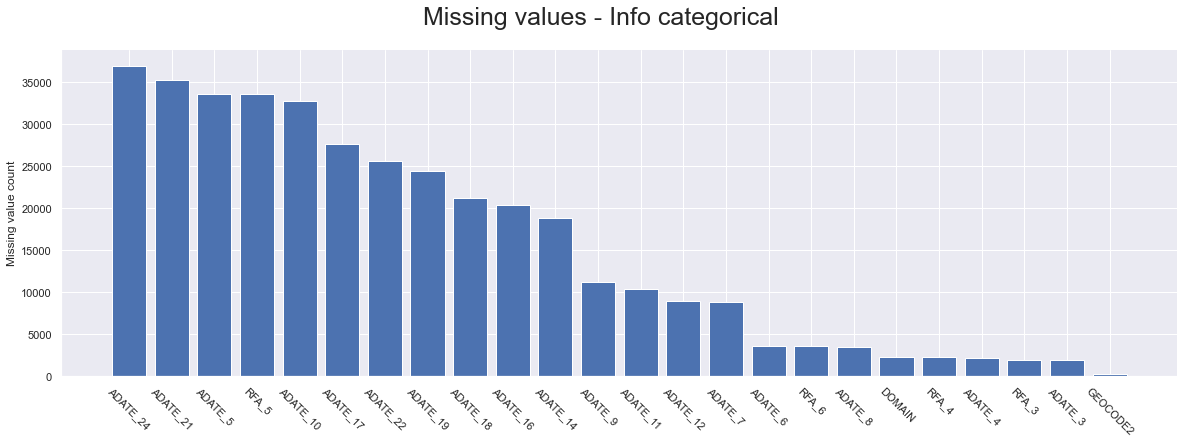

In [76]:
#NUMBER OF MISSING VALUES IN EACH FEATURE

sns.set()

fig,ax1 = plt.subplots(1, figsize=(20,6))
ax1_data=missings.isna().sum().sort_values(ascending=False)
ax1.bar(x=ax1_data.index, height=ax1_data)
plt.suptitle("Missing values - Info categorical", fontsize=25)
ax1.set_ylabel("Missing value count")
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
for tick in ax1.get_xticklabels():
    tick.set_rotation(-45)

plt.show()

In [77]:
test = info_categorical.copy()
imputer = mdi.RandomSampleImputer(seeding_method='add')
imputer.fit(test)
test = imputer.transform(test)

In [78]:
test.isna().sum().sort_values(ascending = False).head()

RFA_7       0
PETS        0
PLATES      0
CARDS       0
KIDSTUFF    0
dtype: int64

In [79]:
info_categorical = test.copy()

<hr>
<a class="anchor" id="2.6.">
    
# 2.6. Handling Outliers - Info
    
</a>

In [80]:
data = info_metric.copy()

In [81]:
# Transformations
rstate = np.random.RandomState(304)
yj = prep.PowerTransformer(method='yeo-johnson')
qt = prep.QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=rstate)

Info_yj = yj.fit_transform(data)
Info_qt = qt.fit_transform(data)

#Merging
Dftransformed = np.concatenate((Info_yj, Info_qt), axis=1)
merge_labels =list(map(lambda x: "yj_" + x, data.columns.to_list()))+list(map(lambda x: "qt_" + x, data.columns.to_list()))
df_info = pd.DataFrame(Dftransformed, columns=merge_labels, index=data.index)

In [82]:
#Treating outliers from INFO
qt_info = df_info.loc[:,[i for i in df_info.columns.to_list() if "qt" in i]]
yj_info = df_info.loc[:,[i for i in df_info.columns.to_list() if "yj" in i]]

In [83]:
#Outliers for INFO
outlier_info = pd.concat([std(yj_info, 4), std(qt_info, 4), iqr(yj_info, 2.5), iqr(qt_info, 2.5)], axis=1)
outlier_info.columns = ["outyjstd","outqtstd","outyjiqr","outqtiqr"]

In [84]:
std_data = prep.MinMaxScaler().fit_transform(data)

In [85]:
lof = neighb.LocalOutlierFactor(n_neighbors=30, contamination="auto")
outlof = lof.fit_predict(std_data)
lof_scores = lof.fit(std_data).negative_outlier_factor_

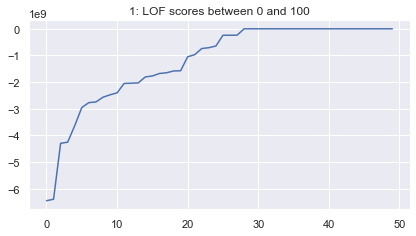

In [86]:
sns.set()
fig = plt.figure(figsize=(15,8))
gs = gspec.GridSpec(2,2)
ax1 = fig.add_subplot(gs[1,0]) # First row, second column
ax1.plot(np.sort(lof_scores)[:50])

ax1.set_title("1: LOF scores between 0 and 100")
plt.subplots_adjust(hspace=0.3)
plt.show()

In [87]:
top_lof_scores = data.index.isin(lof_scores.argsort()[:20]+1)
out_mask = top_lof_scores

In [88]:
std(info_metric).sum()

68757

In [89]:
iqr(info_metric).sum()

95171

Once LOF was removing very few outliers and the Std and Iqr methods were removing way too much data (as previously predicted due to data distribution), we decided to use a manual approach and eliminate rows considered outliers through visualizations(boxpolots and hists).

In [90]:
info_metric = info_metric.loc[info_metric['LOCALGOV'] < 70]
info_metric = info_metric.loc[info_metric['STATEGOV'] < 60]
info_metric = info_metric.loc[info_metric['FEDGOV'] < 60]
info_metric = info_metric.loc[info_metric['MARR2'] < 80]
info_metric = info_metric.loc[info_metric['MARR3'] < 70]
info_metric = info_metric.loc[info_metric['HHP1'] < 600]
info_metric = info_metric.loc[info_metric['HHP2'] < 600]
info_metric = info_metric.loc[info_metric['DW3'] < 80]
info_metric = info_metric.loc[info_metric['DW8'] < 90]
info_metric = info_metric.loc[info_metric['HHD7'] < 80]
info_metric = info_metric.loc[info_metric['HHD8'] < 20]
info_metric = info_metric.loc[info_metric['HHD9'] < 80]
info_metric = info_metric.loc[info_metric['HHD12'] < 80]
info_metric = info_metric.loc[info_metric['ETHC1'] < 60]
info_metric = info_metric.loc[info_metric['ETHC4'] < 50]
info_metric = info_metric.loc[info_metric['RHP3'] < 50]
info_metric = info_metric.loc[info_metric['RHP4'] < 30]
info_metric = info_metric.loc[info_metric['HUPA5'] < 90]
info_metric = info_metric.loc[info_metric['HUPA7'] < 60]
info_metric = info_metric.loc[info_metric['DMA'] > 0]
info_metric = info_metric.loc[info_metric['IC5'] < 150000]
info_metric = info_metric.loc[info_metric['IC8'] < 80]
info_metric = info_metric.loc[info_metric['IC9'] < 80]
info_metric = info_metric.loc[info_metric['IC10'] < 80]
info_metric = info_metric.loc[info_metric['IC11'] < 80]
info_metric = info_metric.loc[info_metric['IC12'] < 40]
info_metric = info_metric.loc[info_metric['IC13'] < 40]
info_metric = info_metric.loc[info_metric['IC14'] < 80]
info_metric = info_metric.loc[info_metric['IC15'] < 90]
info_metric = info_metric.loc[info_metric['IC17'] < 90]
info_metric = info_metric.loc[info_metric['IC18'] < 90]
info_metric = info_metric.loc[info_metric['IC19'] < 90]
info_metric = info_metric.loc[info_metric['IC20'] < 90]
info_metric = info_metric.loc[info_metric['IC21'] < 45]
info_metric = info_metric.loc[info_metric['IC22'] < 60]
info_metric = info_metric.loc[info_metric['IC23'] < 80]
info_metric = info_metric.loc[info_metric['HHAS2'] < 90]
info_metric = info_metric.loc[info_metric['TPE2'] < 90]
info_metric = info_metric.loc[info_metric['TPE3'] < 90]
info_metric = info_metric.loc[info_metric['TPE4'] < 70]
info_metric = info_metric.loc[info_metric['TPE5'] < 50]
info_metric = info_metric.loc[info_metric['TPE6'] < 40]
info_metric = info_metric.loc[info_metric['TPE7'] < 20]
info_metric = info_metric.loc[info_metric['TPE9'] < 80]
info_metric = info_metric.loc[info_metric['TPE10'] < 80]
info_metric = info_metric.loc[info_metric['TPE12'] < 80]
info_metric = info_metric.loc[info_metric['OCC1'] < 80]
info_metric = info_metric.loc[info_metric['OCC2'] < 80]
info_metric = info_metric.loc[info_metric['OCC3'] < 60]
info_metric = info_metric.loc[info_metric['OCC4'] < 80]
info_metric = info_metric.loc[info_metric['OCC5'] < 80]
info_metric = info_metric.loc[info_metric['OCC6'] < 30]
info_metric = info_metric.loc[info_metric['OCC8'] < 80]
info_metric = info_metric.loc[info_metric['OCC9'] < 80]
info_metric = info_metric.loc[info_metric['OCC10'] < 80]
info_metric = info_metric.loc[info_metric['OCC11'] < 80]
info_metric = info_metric.loc[info_metric['OCC12'] < 80]
info_metric = info_metric.loc[info_metric['OCC13'] < 80]
info_metric = info_metric.loc[info_metric['EIC1'] < 90]
info_metric = info_metric.loc[info_metric['EIC3'] < 80]
info_metric = info_metric.loc[info_metric['EIC4'] < 90]
info_metric = info_metric.loc[info_metric['EIC5'] < 90]
info_metric = info_metric.loc[info_metric['EIC6'] < 45]
info_metric = info_metric.loc[info_metric['EIC7'] < 80]
info_metric = info_metric.loc[info_metric['EIC8'] < 80]
info_metric = info_metric.loc[info_metric['EIC9'] < 80]
info_metric = info_metric.loc[info_metric['EIC10'] < 60]
info_metric = info_metric.loc[info_metric['EIC11'] < 80]
info_metric = info_metric.loc[info_metric['EIC12'] < 40]
info_metric = info_metric.loc[info_metric['EIC13'] < 80]
info_metric = info_metric.loc[info_metric['EIC14'] < 80]
info_metric = info_metric.loc[info_metric['EIC15'] < 90]
info_metric = info_metric.loc[info_metric['EIC16'] < 60]
info_metric = info_metric.loc[info_metric['OEDC1'] < 60]
info_metric = info_metric.loc[info_metric['OEDC2'] < 60]
info_metric = info_metric.loc[info_metric['OEDC3'] < 60]
info_metric = info_metric.loc[info_metric['OEDC4'] < 80]
info_metric = info_metric.loc[info_metric['OEDC6'] < 80]
info_metric = info_metric.loc[info_metric['OEDC7'] < 40]
info_metric = info_metric.loc[info_metric['EC2'] < 80]
info_metric = info_metric.loc[info_metric['EC3'] < 80]
info_metric = info_metric.loc[info_metric['EC4'] < 80]
info_metric = info_metric.loc[info_metric['EC5'] < 80]
info_metric = info_metric.loc[info_metric['EC7'] < 80]
info_metric = info_metric.loc[info_metric['EC8'] < 80]
info_metric = info_metric.loc[info_metric['SEC3'] < 15]
info_metric = info_metric.loc[info_metric['SEC4'] < 60]
info_metric = info_metric.loc[info_metric['AFC3'] < 70]
info_metric = info_metric.loc[info_metric['AFC4'] < 80]
info_metric = info_metric.loc[info_metric['VC2'] < 90]
info_metric = info_metric.loc[info_metric['AFC4'] < 80]
info_metric = info_metric.loc[info_metric['ANC1'] < 80]
info_metric = info_metric.loc[info_metric['ANC5'] < 40]
info_metric = info_metric.loc[info_metric['ANC7'] < 60]
info_metric = info_metric.loc[info_metric['ANC8'] < 50]
info_metric = info_metric.loc[info_metric['ANC9'] < 60]
info_metric = info_metric.loc[info_metric['ANC10'] < 80]
info_metric = info_metric.loc[info_metric['ANC12'] < 35]
info_metric = info_metric.loc[info_metric['ANC13'] < 20]
info_metric = info_metric.loc[info_metric['ANC15'] < 25]
info_metric = info_metric.loc[info_metric['LSC3'] < 80]
info_metric = info_metric.loc[info_metric['VOC3'] < 90]
info_metric = info_metric.loc[info_metric['HC15'] < 15]
info_metric = info_metric.loc[info_metric['AC1'] < 60]

In [91]:
info_metric.head()

,AGE,INCOME,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,AGE902,...,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1
CONTROLN,,,,,,,,,,,,,,,,,,,,,
95515,63.00,3.72,0.0,39.0,34.0,18.0,10.0,2.0,1.0,48.0,...,0.0,0.0,33.0,65.0,40.0,99.0,99.0,6.0,2.0,10.0
148535,48.00,6.00,0.0,15.0,55.0,11.0,6.0,2.0,1.0,41.0,...,0.0,0.0,99.0,0.0,99.0,99.0,99.0,20.0,4.0,6.0
15078,60.66,3.00,0.0,20.0,29.0,33.0,6.0,8.0,1.0,43.0,...,0.0,15.0,22.0,77.0,17.0,97.0,92.0,9.0,2.0,6.0
172556,72.00,1.00,0.0,23.0,14.0,31.0,3.0,0.0,3.0,40.0,...,0.0,16.0,23.0,77.0,22.0,93.0,89.0,16.0,2.0,6.0
7112,80.00,3.00,1.0,28.0,9.0,53.0,26.0,3.0,2.0,45.0,...,0.0,0.0,99.0,1.0,21.0,99.0,96.0,6.0,2.0,7.0


In [92]:
sizes()

Info: 95412 rows and 320 comlumns
Donors: 92827 rows and 76 comlumns
IMetric: 94861 rows and 269 comlumns
DMetric: 95412 rows and 12 comlumns
ICategorical: 95412 rows and 51 comlumns
DCategorical: 95412 rows and 64 comlumns
Reduced 80 from the original dataset


In [93]:
donors = pd.concat([donors_metric,donors_categorical], axis = 1)
info = pd.concat([info_metric,info_categorical], axis = 1)

In [95]:
info_metric.to_csv('info_metric_pt1.csv')
info_categorical.to_csv('info_categorical_pt1.csv')
donors_metric.to_csv('donors_metric_pt1.csv')
donors_categorical.to_csv('donors_categorical_pt1.csv')

<hr>
<a class="anchor" id="3.">
    
#  3. Redudancy
    
</a>

<hr>
<a class="anchor" id="3.1">
    
#  3.1. Donors Metrics
    
</a> 

In [ ]:
info_metric = pd.read_csv(r'OneDrive\NOVAIMSNOVA IMS\Master\1st Year\1st Semester\Data Mining\Group Project\info_metric_pt1.csv')
info_categorical = pd.read_csv(r'OneDrive\NOVAIMSNOVA IMS\Master\1st Year\1st Semester\Data Mining\Group Project\info_categorical_pt1.csv')
donors_metric = pd.read_csv(r'OneDrive\NOVAIMSNOVA IMS\Master\1st Year\1st Semester\Data Mining\Group Project\donors_metric_pt1.csv')
donors_categorical = pd.read_csv(r'OneDrive\NOVAIMSNOVA IMS\Master\1st Year\1st Semester\Data Mining\Group Project\donors_categorical_pt1.csv')

In [ ]:
test = donors_metric.copy()

In [ ]:
sizes()

In [ ]:
# CORRELATION MATRIX
corr = test.corr()
upper = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=upper, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#CORRELATION MATRIX

fig = plt.figure(figsize=(10, 8))

corr = np.round(test.corr(method="pearson"), decimals=2)

mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 

sns.heatmap(data=corr, annot=annot, cmap=sns.diverging_palette(220, 10, as_cmap=True), 
            fmt='s', vmin=-1, vmax=1, center=0, square=True, linewidths=.5)

fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20)

plt.show()

In [ ]:
#GETTING FEATURES THAT HAVE VERY HIGH CORRELATIONS
corr_matrix = test.corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [ ]:
to_drop

In [ ]:
max_values = upper.describe().loc[['max']]
max_values.min().sort_values(ascending = True).head()

In [ ]:
donors_metric.var().sort_values(ascending = True).head()

## Analysis

- **CARDPROM** and **NUMPROM** are extremely correlated, and **CARDPROM** seems to be the least important one. 
- **CardGift** and **Ngiftall** are also very alike, and cardgift is the least important/ more specific of the two, we extract more information by keeping the more general variables.
- With the same logic we decided to substitute **Min** and **Max** RAMNT by just the **AVGGIFT** 
- We decided to remove **LASTGIFT** for being too related with **AVGGIFT**, once lastgift was the only gift for many people.
- **CARDPM12** has 0,61 of correlation with the **NUMPRM12**, and the number of promotions seems more relevant. Also, it seems to have almost no correlation with any other feature
- **NUMPROM** was also removed for having high correlations.


In [ ]:
donors.drop(['CARDPROM','CARDGIFT','MINRAMNT','MAXRAMNT','CARDPM12','LASTGIFT','NUMPROM'], axis=1, inplace=True)
donors_metric.drop(['CARDPROM','CARDGIFT','MINRAMNT','MAXRAMNT','CARDPM12','LASTGIFT','NUMPROM'], axis=1, inplace=True)

In [ ]:
print('Dropped', 18 - donors_metric.shape[1], 'features' )

In [ ]:
sizes()

In [ ]:
# CORRELATION MATRIX
corr = donors_metric.corr()
upper = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=upper, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<hr>
<a class="anchor" id="3.2.">
    
#  3.2. Donors categorical
    
</a> 

In [ ]:
sizes()

In [ ]:
df_ = donors_categorical.copy()

In [ ]:
# df_ = df_.drop(columns = ['RFA_2','ADATE_18'])

In [ ]:
df_.columns

In [ ]:
# GETTING CORRELATIONS FOR CATEGORICAL VARIABLES

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

Based on:
- https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
- https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

In [ ]:
from scipy.stats import chi2_contingency
()
rows= []

for var1 in df_:
  col = []
  for var2 in df_ :
    cramers =cramers_V(df_[var1], df_[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_matrix = pd.DataFrame(cramers_results, columns = df_.columns, index =df_.columns)

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.abs().unstack()
    labels_to_drop = get_redundant_pairs(df_matrix)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_matrix, 30))

In [ ]:
upper = df_matrix.where(np.triu(np.ones(df_matrix.shape), k=1).astype(np.bool))

# we'll drop features that are too much correlated with others, using firstly the threshold of 0.85, and then check manually
# those features who have plus 0.75, like we did previously on donors metric
to_drop_above = [column for column in upper.columns if any(upper[column] > 0.85)]

In [ ]:
to_drop_above

All of this makes sense to be removed, once MDMAUD alone gets all the info from MDMAUD_F,MDMAU_A and MAJOR.

RFA_2F, RFA_2R and RFA_2A compile information from RFA_2, so they might not be usefull. (And RFA_2R has L for every row).

Besides, and following the same logic, we'll drop RFA_3 and RFA_4 for being very correlated to RFA_2, which we decide to keep

In [ ]:
drop_analysis = ['RFA_2R'] #,'RFA_3','RFA_4'

In [ ]:
to_drop_below = upper.describe().loc[['max']]
to_drop_below = to_drop_below.min().sort_values(ascending = True)
to_drop_below

Wont drop any categorical column by its low correlation, once there's no obligation to have any correlation with others variables

In [ ]:
donors_categorical = donors_categorical.drop(columns = to_drop_above)
donors_categorical = donors_categorical.drop(columns = drop_analysis)

In [ ]:
print('Dropped', 68 - donors_categorical.shape[1], 'features' )

In [ ]:
sizes()

<hr>
<a class="anchor" id="3.3">
    
#  3.3. Info Metric
    
</a> 

In [ ]:
test = info_metric.copy()

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(test)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(test, 20))

In [ ]:
corr_matrix = test.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop_above = [column for column in upper.columns if any(upper[column] > 0.85)] #get the list above
to_drop_below = upper.describe().loc[['max']]
to_drop_below = to_drop_below.min().sort_values(ascending = True)

We'll drop features that are way too correlated with each other (>85%), once they are repeating information stated by other features, as one can conclude by a quick analysis of the metadata.

Some examples:
- HHAGE1 Percent Households w/ Person 65+

- HHAGE2 Percent Households w/ Person 65+ Living Alone

- HHAGE3 Percent Households Headed by an Elderly Person Age 65+ 


- HV1                         Median Home Value in hundreds

- HV2                         Average Home Value in hundreds

- HV3                         Median Contract Rent in hundreds

- HV4                         Average Contract Rent in hundreds


- LFC3                        Percent Females in Labor Force
- LFC4                        Percent Adult Males Employed
- LFC5                        Percent Adult Females Employed

In [ ]:
to_drop_above

In [ ]:
test = test.drop(columns = to_drop_above)

In [ ]:
get_top_abs_correlations(test, 20)

Again, an exploration of metadata alongside with some still high correlations, we can try to drop some more features, so the clustering process becomes more handy.


- HC20                        Percent Housing Units w/ Complete Plumbing Facilities
- HC21                        Percent Housing Units w/ Telephones


- HHD6                        Percent Persons in Non-Family Household
- HHN1                        Percent 1 Person Households


- VC1                         Percent Vietnam Veterans Age 16+
- VIETVETS                    % Vietnam Vets


- DW1                         Percent Single Unit Structure
- DW4                         Percent Multi (2+) Unit Structures



In [ ]:
#STILL HIGH CORRELATIONS BETWEEN FEATURES THAT ARE REDUDANT
still_high = ['HC20','HHD6','ETHC6','AFC3','CHIL2','HC2','OEDC1','ETHC2','EC8','VOC2','DW4',
              'VC3','HC20','HHD10','HU1','HC19','DW1','VC1']

In [ ]:
test = test.drop(columns = still_high)

We'll now drop the columns below 5% correlation with any other feature, once there's a very high probability they wont make any difference on the further clusters.

In [ ]:
to_drop_below

In [ ]:
to_drop_below = ['MALEMILI']
test = test.drop(columns = to_drop_below)

It is now important that we reduce the features accordingally to their lack of variance, which means they wont play an important role on clustering data.

In [ ]:
test.var().sort_values(ascending = True).head(30)

In [ ]:
low_variance = ['ANC11','EIC12','ANC5','ANC15','TPE6','HC15','ANC1','OEDC7','OCC6',
                'ANC9','EIC2','ANC6','TPE7','RHP4','ANC3','ANC14','ANC12','TPE5','ANC13','AFC6',
                'ANC8','EIC6','HHD8']
#We decided to delete this data, once, at the best case (EIC12), they had 82% of the data compiled only in 7% of the columns' range.

In [ ]:
test = test.drop(columns = low_variance)

In [ ]:
print('Dropped', 294 - test.shape[1], 'features' )

In [ ]:
info_metric = test.copy()

In [ ]:
sizes()

<hr>
<a class="anchor" id="3.1.4">
    
#  3.4. Info categorical
    
</a> 

In [ ]:
df_ = info_categorical.copy()

In [ ]:
rows= []
for var1 in df_:
  col = []
  for var2 in df_ :
    cramers =cramers_V(df_[var1], df_[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)

cramers_results = np.array(rows)
df_matrix = pd.DataFrame(cramers_results, columns = df_.columns, index = df_.columns)

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=20):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)

    return au_corr[0:20]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_matrix, 10).sort_values(ascending = False).head(10))

In [ ]:
import numpy as np

test = df_matrix.copy()
corr_matrix = test

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop_above = [column for column in upper.columns if any(upper[column] > 0.80)]
to_drop_below = upper.describe().loc[['max']]
to_drop_below = to_drop_below.min().sort_values(ascending = True)

In [ ]:
to_drop_above

In [ ]:
to_drop_below.head()

In [ ]:
to_drop_below = ['STATE']

Once, we're dealing with categorical variables, it's normal not to find very high correlations and, therefore, we'll one remove ZIP and Geocode, which are very well correlated with ZIP. On the bottom, state has no correlation with any other feature, which might make some sense. Though, we'll remove it and stick to ZIP as the geographic feature.

In [ ]:
info_categorical = info_categorical.drop(columns = to_drop_above)
info_categorical = info_categorical.drop(columns = to_drop_below)

**----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<hr>
<a class="anchor" id="4.">
    
# 4. Final Adjustments
    
</a>

Given the upper methodology, after several processes of trial and error, the following preprocessing steps were retained, as they provided the best results. These are a simplified and slightly modified version of the upper complete preprocesing analysis.The below analysis is simpler and less scientifically in-depth, as it contains solely the most necessary steps for the final clustering output. This procedure allowed us, also, to quickly change the core-preprocessing steps without the need of running the complete preprocessing analysis. The main difference below is that the number of variables erased was decreased, as certain variables were observed to be important during the clustering process that had been erased previously through high/low correlation analysis. The normalization procedure was, thus, applied to different variables and the outliers received no treatment. Feature Engineering was kept, as it was defined as optimal in the clustering process. 
Note: Using a MinMax Scaler provided worse visualizations in the cluster profiling, given that the scale of the data would be all between 0 and 1. Nonetheless, the Standard Scaler, in the end result, gave worse Final Merged Cluster results, with a very large % of data belonging to just 1 cluster. The inertia plot for the K-Means, using the Standard Scaler, suggested the usage of just 2 clusters to define all data, with one containing the large majority of data points, so MinMax was kept.

In [ ]:
df = pd.read_csv('donors.csv', index_col=0)
donors= df.copy()
donors_sup=donors.copy()
info= donors_sup.copy()

cols_neigh = list(range(72,358)) 
info= info[info.columns[cols_neigh]]
info_sup= donors_sup[['DOB','TCODE','STATE','ZIP','INCOME','WEALTH1','DOMAIN','MAILCODE','HOMEOWNR','CHILD03','CHILD07','CHILD12','CHILD18','NUMCHLD','GENDER', 'MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML',                     
'MAGFEM','MAGMALE','PUBGARDN','PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO', 'PUBOPP','MALEMILI','MALEVET','VIETVETS',                    
'WWIIVETS','LOCALGOV','STATEGOV','FEDGOV','WEALTH2','COLLECT1','VETERANS','BIBLE','CATLG','HOMEE','PETS','CDPLAY','STEREO',                      
'PCOWNERS','PHOTO','CRAFTS','FISHER','GARDENIN','BOATS','WALKER','KIDSTUFF','CARDS','PLATES','LIFESRC','HPHONE_D','GEOCODE2']]

info= info_sup.merge(info, left_index= True, right_index= True)
donors_col= donors.columns.drop(info.columns).tolist()
donors= donors[donors_col]
info['CONTROLN']= donors_sup['CONTROLN']
donors.set_index('CONTROLN',inplace=True)
info.set_index('CONTROLN',inplace=True)

In [ ]:
# If it has more than 70K NaN values, the columns will be dropped. This implies that the column has more than 73% of 
# missing values,instead of removing variables for above 40%, allowing us to retain more information.
donors.drop(['RDATE_3','RDATE_4','RDATE_5','RDATE_6', 'RDATE_7','RDATE_8', 'RDATE_9','RDATE_10','RDATE_11','RDATE_12',
             'RDATE_13','RDATE_14','RDATE_15','RDATE_16','RDATE_18','RDATE_22','RAMNT_8','RAMNT_12','RAMNT_14','RAMNT_16',
             'RAMNT_18','RAMNT_22',
             'RDATE_17','RDATE_19','RDATE_20','RDATE_21','RDATE_23','RDATE_24','RAMNT_3','RAMNT_4','RAMNT_5','RAMNT_6',
             'RAMNT_7','RAMNT_9','RAMNT_10','RAMNT_11','RAMNT_13','RAMNT_15','RAMNT_17','RAMNT_19','RAMNT_20','RAMNT_21',
             'RAMNT_23','RAMNT_24','PVASTATE'], axis=1, inplace=True)

**Separating the metric and non_metric variables from each dataframe**

In [ ]:
donors_metric= ['HIT','CARDPROM','NUMPROM','CARDPM12','NUMPRM12','RAMNTALL','NGIFTALL','CARDGIFT','MINRAMNT',
                'MAXRAMNT','LASTGIFT','TIMELAG','AVGGIFT']
donors_categorical= donors.columns.drop(donors_metric).to_list()
info_metric= ['INCOME','MALEMILI','MALEVET','VIETVETS','WWIIVETS','LOCALGOV','STATEGOV','FEDGOV',
             'POP901', 'POP902', 'POP903', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C4', 'POP90C5', 'ETH1', 
              'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 
              'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907',
              'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1',
              'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN1', 'HHN2', 'HHN3', 'HHN4', 
              'HHN5', 'HHN6', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'HHP1', 'HHP2', 'DW1', 'DW2', 'DW3', 'DW4', 'DW5',
              'DW6', 'DW7', 'DW8', 'DW9', 'HV1', 'HV2', 'HV3', 'HV4', 'HU1', 'HU2', 'HU3', 'HU4', 'HU5', 'HHD1', 'HHD2',
              'HHD3', 'HHD4', 'HHD5', 'HHD6', 'HHD7', 'HHD8', 'HHD9', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC2', 'ETHC3',
              'ETHC4', 'ETHC5', 'ETHC6', 'HVP1', 'HVP2', 'HVP3', 'HVP4', 'HVP5', 'HVP6', 'HUR1', 'HUR2', 'RHP1', 'RHP2', 
              'RHP3', 'RHP4', 'HUPA1', 'HUPA2', 'HUPA3', 'HUPA4', 'HUPA5', 'HUPA6', 'HUPA7', 'RP1', 'RP2', 'RP3', 'RP4',
              'MSA', 'ADI', 'DMA', 'IC1', 'IC2', 'IC3', 'IC4', 'IC5', 'IC6', 'IC7', 'IC8', 'IC9', 'IC10', 'IC11', 'IC12',
              'IC13', 'IC14', 'IC15', 'IC16', 'IC17', 'IC18', 'IC19', 'IC20', 'IC21', 'IC22', 'IC23', 'HHAS1', 'HHAS2',
              'HHAS3', 'HHAS4', 'MC1', 'MC2', 'MC3', 'TPE1', 'TPE2', 'TPE3', 'TPE4', 'TPE5', 'TPE6', 'TPE7', 'TPE8', 
              'TPE9', 'PEC1', 'PEC2', 'TPE10', 'TPE11', 'TPE12', 'TPE13', 'LFC1', 'LFC2', 'LFC3', 'LFC4', 'LFC5', 'LFC6',
              'LFC7', 'LFC8', 'LFC9', 'LFC10', 'OCC1', 'OCC2', 'OCC3', 'OCC4', 'OCC5', 'OCC6', 'OCC7', 'OCC8', 'OCC9',
              'OCC10', 'OCC11', 'OCC12', 'OCC13', 'EIC1', 'EIC2', 'EIC3', 'EIC4', 'EIC5', 'EIC6', 'EIC7', 'EIC8', 'EIC9',
              'EIC10', 'EIC11', 'EIC12', 'EIC13', 'EIC14', 'EIC15', 'EIC16', 'OEDC1', 'OEDC2', 'OEDC3', 'OEDC4', 'OEDC5',
              'OEDC6', 'OEDC7', 'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6', 'EC7', 'EC8', 'SEC1', 'SEC2', 'SEC3', 'SEC4', 
              'SEC5', 'AFC1', 'AFC2', 'AFC3', 'AFC4', 'AFC5', 'AFC6', 'VC1', 'VC2', 'VC3', 'VC4', 'ANC1', 'ANC2', 'ANC3',
              'ANC4', 'ANC5', 'ANC6', 'ANC7', 'ANC8', 'ANC9', 'ANC10', 'ANC11', 'ANC12', 'ANC13', 'ANC14', 'ANC15', 'POBC1',
              'POBC2', 'LSC1', 'LSC2', 'LSC3', 'LSC4', 'VOC1', 'VOC2', 'VOC3', 'HC1', 'HC2', 'HC3', 'HC4', 'HC5', 'HC6',
              'HC7', 'HC8', 'HC9', 'HC10', 'HC11', 'HC12', 'HC13', 'HC14', 'HC15', 'HC16', 'HC17', 'HC18', 'HC19', 'HC20',
              'HC21', 'MHUC1', 'MHUC2', 'AC1', 'AC2','MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML','MAGFEM','MAGMALE',
              'PUBGARDN','PUBCULIN','PUBHLTH','PUBDOITY','PUBNEWFN','PUBPHOTO','PUBOPP']
info_categorical= info.columns.drop(info_metric).to_list()

**Donors Missing Values Imputation**- Better results were met with the mode imputation. NEXTDATE and TIMELAG were treated the same way as before, for precisely the reasons specified.

In [ ]:
donors_categorical.remove('NEXTDATE')
modes= donors[donors_categorical].mode().loc[0]
donors.fillna(modes,inplace=True)
donors_categorical.append('NEXTDATE')
donors['TIMELAG'].fillna(0,inplace=True)

**Feature Engineering**

In [ ]:
info.drop(['NUMCHLD','TCODE','CHILD07','CHILD03','CHILD12','CHILD18'], axis=1, inplace=True)
info_categorical.remove('TCODE')
info_categorical.remove('CHILD07')
info_categorical.remove('CHILD03')
info_categorical.remove('CHILD12')
info_categorical.remove('CHILD18')

In [ ]:
info["Year"], info['erase']= info['DOB'].str.split("-",1).str
donors["Year First"], donors['erase']= donors['ODATEDW'].str.split("-",1).str
info['Age']= 2020- (info['Year'].astype(float))
donors['OriginDate']= 2020- (donors['Year First'].astype(float))
info.drop(['DOB','erase','Year'], axis=1, inplace=True)
donors.drop(['Year First', 'erase','ODATEDW'], axis=1, inplace=True)
donors_categorical.remove('ODATEDW')

def get_data(df):
    for row in df.filter(regex='DATE').columns:
        df[row] = df[row].apply(str)
        df[row] = df[row].str[:4]
        df[row]= df[row].str.replace(" ","")
        df[row]= 2020 - (df[row].astype(float))
                                        
get_data(donors)

**Info Missing Values and Adjustements**

In [ ]:
info_metric.append('Age')
median_values= info[info_metric].median()
info.fillna(median_values, inplace=True)
info_categorical.remove('NUMCHLD')
info_categorical.remove('DOB')
mode_values= info[info_categorical].mode().loc[0]
info.fillna(mode_values,inplace=True)

In [ ]:
pd.reset_option('all')
donors['NEXTDATE'].fillna(0,inplace=True)
donors['SOLP3']=donors['SOLP3'].replace(" ", "010")
donors['SOLIH']=donors['SOLIH'].replace(" ", "010") 
donors['NOEXCH']=donors['NOEXCH'].replace(" ","Exchange")
donors['NOEXCH']=donors['NOEXCH'].replace("X","No Exchange")
donors['NOEXCH']=donors['NOEXCH'].replace("1","Exchange")
donors['NOEXCH']=donors['NOEXCH'].replace("0","No Exchange")
donors['NOEXCH']=donors['NOEXCH'].replace(1,"Exchange")
donors['NOEXCH']=donors['NOEXCH'].replace(0,"No Exchange")
donors['RECINHSE']=donors['RECINHSE'].replace(" ", "Not In House")
donors['RECINHSE']=donors['RECINHSE'].replace("X", "Donation to In House")
donors['RECP3']=donors['RECP3'].replace(" ", "Not P3")
donors['RECP3']=donors['RECP3'].replace("X", "Donation to P3")
donors['RECPGVG']=donors['RECPGVG'].replace(" ", "Not Planned Giving")
donors['RECPGVG']=donors['RECPGVG'].replace("X", "Planned Giving")
donors['RECSWEEP']=donors['RECSWEEP'].replace(" ", "Not Sweepstakes")
donors['RECSWEEP']=donors['RECSWEEP'].replace("X", "Sweepstakes")
donors['PEPSTRFL']=donors['PEPSTRFL'].replace(" ", "Not PEP STAR")
donors['PEPSTRFL']=donors['PEPSTRFL'].replace("X", "PEP STAR")
donors['DATASRCE']= donors['DATASRCE'].replace("1","MetroMail")
donors['DATASRCE']= donors['DATASRCE'].replace("2","Polk")
donors['DATASRCE']= donors['DATASRCE'].replace("3","Metro+Polk")
donors['DATASRCE']= donors['DATASRCE'].replace(" ",np.nan)
source_mode= donors['DATASRCE'].mode().loc[0]
donors['DATASRCE'].fillna(source_mode, inplace=True)
info['MAILCODE']= info['MAILCODE'].replace(" ","Address Ok")
info['MAILCODE']= info['MAILCODE'].replace("B","Address Bad")
info['HOMEOWNR']= info['HOMEOWNR'].replace(" ","Unknown")
info['HOMEOWNR']= info['HOMEOWNR'].replace("U","Unknown")
info['HOMEOWNR']= info['HOMEOWNR'].replace("H","Home_Owner")
info['GENDER']= info['GENDER'].replace(" ","Unknown Gender")
info['GENDER']= info['GENDER'].replace("M","Male")
info['GENDER']= info['GENDER'].replace("F","Female")
info['GENDER']= info['GENDER'].replace("U","Unknown Gender")
info['GENDER']= info['GENDER'].replace("J","Unknown Gender")
info['GENDER']= info['GENDER'].replace("C","Unknown Gender")
info['GENDER']= info['GENDER'].replace("A","Unknown Gender")
info['COLLECT1']= info['COLLECT1'].replace(" ","N")
info['VETERANS']= info['VETERANS'].replace(" ","N")
info['BIBLE']= info['BIBLE'].replace(" ","N")
info['CATLG']= info['CATLG'].replace(" ","N")
info['HOMEE']= info['HOMEE'].replace(" ","N")
info['PETS']= info['PETS'].replace(" ","N")
info['CDPLAY']= info['CDPLAY'].replace(" ","N")
info['STEREO']= info['STEREO'].replace(" ","N")
info['PCOWNERS']= info['PCOWNERS'].replace(" ","N")
info['CRAFTS']= info['CRAFTS'].replace(" ","N")
info['FISHER']= info['FISHER'].replace(" ","N")
info['GARDENIN']= info['GARDENIN'].replace(" ","N")
info['BOATS']= info['BOATS'].replace(" ","N")
info['WALKER']= info['WALKER'].replace(" ","N")
info['KIDSTUFF']= info['KIDSTUFF'].replace(" ","N")
info['CARDS']= info['CARDS'].replace(" ","N")
info['PLATES']= info['PLATES'].replace(" ","N")

**Correlations Donors**

In [ ]:
donors.drop(['CARDPROM','CARDGIFT','MINRAMNT','MAXRAMNT','CARDPM12','LASTGIFT','NUMPROM'], axis=1, inplace=True)
donors_metric.remove('CARDPROM')
donors_metric.remove('CARDGIFT')
donors_metric.remove('MINRAMNT')
donors_metric.remove('MAXRAMNT')
donors_metric.remove('CARDPM12')
donors_metric.remove('LASTGIFT')
donors_metric.remove('NUMPROM')

donors.drop('MDMAUD', axis=1, inplace=True)
donors_categorical.remove('MDMAUD')
donors.drop('RFA_2', axis=1, inplace=True)
donors_categorical.remove('RFA_2')

**Correlations Info**

In [ ]:
corr_matrix = info[info_metric].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
info.drop(to_drop, axis=1, inplace=True)

def remove(to_drop):
    for cols in to_drop:
        info_metric.remove(cols)
remove(to_drop)
print('Dropped',344 - info.shape[1],'columns')

**Normalization**

In [ ]:
def listadd(df):
    for row in df.filter(regex='DATE').columns:
        donors_metric.append(row)
        donors_categorical.remove(row)
listadd(donors)

donors_norm= donors.copy()
info_norm= info.copy()

scaler= MinMaxScaler() 
scaled_feat= scaler.fit_transform(donors_norm[donors_metric])
donors_norm[donors_metric]= scaled_feat

scaler2= MinMaxScaler()
scaled_feat2= scaler2.fit_transform(info_norm[info_metric])
info_norm[info_metric]= scaled_feat2

donors= donors_norm.copy()
info= info_norm.copy()

**Exporting the Datasets to be utilized**

In [ ]:
donors.to_csv('donors preprocessed_final')
info.to_csv('info preprocessed_final')